<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Descripción-del-proyecto" data-toc-modified-id="Descripción-del-proyecto-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Descripción del proyecto</a></span><ul class="toc-item"><li><span><a href="#Descripción-de-datos-utilizados-en-la-primera-parte-del-proyecto:" data-toc-modified-id="Descripción-de-datos-utilizados-en-la-primera-parte-del-proyecto:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Descripción de datos utilizados en la primera parte del proyecto:</a></span></li><li><span><a href="#Descripción-de-datos-utilizados-en-la-segunda-parte-del-proyecto:" data-toc-modified-id="Descripción-de-datos-utilizados-en-la-segunda-parte-del-proyecto:-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Descripción de datos utilizados en la segunda parte del proyecto:</a></span></li></ul></li><li><span><a href="#Parte-1.-Priorizar-hipótesis" data-toc-modified-id="Parte-1.-Priorizar-hipótesis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Parte 1. Priorizar hipótesis</a></span><ul class="toc-item"><li><span><a href="#Importación-de-librerías-y-descarga-de-archivos" data-toc-modified-id="Importación-de-librerías-y-descarga-de-archivos-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Importación de librerías y descarga de archivos</a></span></li><li><span><a href="#Análisis-de-datos" data-toc-modified-id="Análisis-de-datos-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Análisis de datos</a></span></li></ul></li><li><span><a href="#Parte-2.-Análisis-de-test-A/B" data-toc-modified-id="Parte-2.-Análisis-de-test-A/B-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Parte 2. Análisis de test A/B</a></span><ul class="toc-item"><li><span><a href="#Importación-de-librerías-y-descarga-de--archivos" data-toc-modified-id="Importación-de-librerías-y-descarga-de--archivos-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Importación de librerías y descarga de  archivos</a></span></li><li><span><a href="#Exploración-de-archivos" data-toc-modified-id="Exploración-de-archivos-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Exploración de archivos</a></span></li><li><span><a href="#Tratamiento-de-datos" data-toc-modified-id="Tratamiento-de-datos-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Tratamiento de datos</a></span></li><li><span><a href="#Análisis-de-datos" data-toc-modified-id="Análisis-de-datos-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Análisis de datos</a></span></li></ul></li><li><span><a href="#Conclusiones" data-toc-modified-id="Conclusiones-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusiones</a></span></li></ul></div>

# Proyecto toma de decisiones de negocio

## Descripción del proyecto

Analizaré junto con el departamento de marketing de una tienda en línea una lista de hipótesis que hemos recopilado con el objetivo de ayudar a aumentar los ingresos en la tienda.

El trabajo será realizado en dos partes, la primera donde haré un análisis de las hipótesis recopiladas y priorizaré una de ellas y en la segunda parte, realizaré un análisis de test A/B


### Descripción de datos utilizados en la primera parte del proyecto:

Usaré una tabla con los siguientes datos:

- Hypotheses: breves descripciones de las hipótesis
- Reach: alcance del usuario, en una escala del uno a diez
- Impact: impacto en los usuarios, en una escala del uno al diez
- Confidence: confianza en la hipótesis, en una escala del uno al diez
- Effort: los recursos necesarios para probar una hipótesis, en una escala del uno al diez. Cuanto mayor sea el valor Effort, más recursos requiere la prueba.

### Descripción de datos utilizados en la segunda parte del proyecto:

Usaré dos tablas:

Tabla Orders:

- transactionId: identificador de pedido
- visitorId: identificador del usuario que realizó el pedido
- date: fecha del pedido
- revenue: ingresos del pedido
- group: el grupo del test A/B al que pertenece el usuario

Tabla Visits:

- date: la fecha
- group: grupo del test A/B
- visits: el número de visitas en la fecha especificada para el grupo de test A/B especificado

## Parte 1. Priorizar hipótesis

### Importación de librerías y descarga de archivos 

In [ ]:
# Importación de librerías

import pandas as pd

# Descarga de archivo

data= pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
data

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


### Análisis de datos

Voy a analizar las hipótesis recopiladas para ver cual es más prometedora.

In [ ]:
# Cambio nombre de columnas a minuscula
data= data.rename(columns=str.lower)

In [ ]:
# Aplico el framework ICE para priorizar hipótesis

data['ice']= (data['impact'] * data['confidence']) / data['effort']
data[['hypothesis','ice']].sort_values(by='ice', ascending=False)

,hypothesis,ice
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


Podemos observar que las hipótesis más prometedoras según el método ICE son la hipótesis 8,0 y 7. Éstas tienen un alto impacto, alto grado de confianza y requiere un esfuerzo medio.

In [ ]:
# Aplico el framework RICE para priorizar hipótesis

data['rice']= (data['reach'] * data['impact'] * data['confidence']) / data['effort']
data[['hypothesis','rice']].sort_values(by='rice', ascending=False)

,hypothesis,rice
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


Podemos observar que las hipótesis más prometedoras según el método RICE son las hipótesis 7, 2 y 0. Las hipótesis 7 y 2 tienen alto grado de alcance mientras que la hipótesis 0 no tiene tanto.

In [ ]:
# Muestro cambio en la priorización de hipótesis cuando utilizas RICE en lugar de ICE

data[['hypothesis','rice','ice']].sort_values(by='rice', ascending=False)

,hypothesis,rice,ice
7,Add a subscription form to all the main pages....,112.0,11.200000
2,Add product recommendation blocks to the store...,56.0,7.000000
0,Add two new channels for attracting traffic. T...,40.0,13.333333
6,Show banners with current offers and sales on ...,40.0,8.000000
8,Launch a promotion that gives users discounts ...,16.2,16.200000
3,Change the category structure. This will incre...,9.0,1.125000
1,Launch your own delivery service. This will sh...,4.0,2.000000
5,Add a customer review page. This will increase...,4.0,1.333333
4,Change the background color on the main page. ...,3.0,1.000000


Como podemos observar, las hipótesis 7 y 0 aparecen como prometedoras tanto en el análisis de ICE como en el de RICE. En este último la hipótesis 7 aparece como la más prometedora. En el análisis RICE también aparece como hipótesis prometedora la hipótesis 2. 

La hipótesis 7 tiene un alcance total (alcanza a todos los usuarios) y tiene un gran impacto también. La hipótesis 2 también tiene un alto grado de alcance aunque no tiene tanto impacto. En el caso de la hipótesis 0, tiene bajo alcance pero tiene un alto impacto. 

## Parte 2. Análisis de test A/B

### Importación de librerías y descarga de  archivos 

In [ ]:
# Importación de librerías

import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

# Descarga de archivos

orders= pd.read_csv('/datasets/orders_us.csv')
visits= pd.read_csv('/datasets/visitors_us.csv')



### Exploración de archivos 

In [ ]:
# Exploración de dataset orders

orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [ ]:
# Exploración dataset visits

visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### Tratamiento de datos

In [ ]:
# Cambio tipo de dato a columna date para los dos datasets

orders['date']= orders['date'].map(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))

visits['date']= visits['date'].map(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))

In [ ]:
# Chequeo que los usarios esten en un solo grupo

groups= orders.groupby('visitorId').agg('nunique')
groups

,transactionId,date,revenue,group
visitorId,,,,
5114589,1,1,1,1
6958315,1,1,1,1
8300375,2,2,2,2
11685486,1,1,1,1
39475350,1,1,1,1
...,...,...,...,...
4266935830,2,1,1,2
4278982564,1,1,1,1
4279090005,1,1,1,1


Como podemos observar hay usuarios que estan en el grupo A y en el grupo B. Voy a analizar quienes son y los sacaré de la base de datos para que no influyan en el resultado.

In [ ]:
# Busco usuarios que estan en los dos grupos

double_group= groups.query('group ==2').reset_index()
double_group.head()

,visitorId,transactionId,date,revenue,group
0,8300375,2,2,2,2
1,199603092,5,5,4,2
2,232979603,2,1,2,2
3,237748145,5,4,3,2
4,276558944,2,2,2,2


Podemos observar que 58 usuarios forman parte de los dos grupos de prueba. Ya que tienen compras en los dos grupos, los voy a sacar para que no distorsionen los resultados ya que no sabremos que grupo influyó más.

In [ ]:
# Creo nuevo dataset de orders filtrado 

dg= double_group['visitorId']

orders_filtered= orders.query('visitorId not in (@dg)')
orders_filtered.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


### Análisis de datos

In [ ]:
# Armo una tabla con valores únicos de fechas y grupos de prueba

dates_group= orders_filtered[['date','group']].drop_duplicates()
dates_group.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [ ]:
# Recopilamos los datos diarios acumulados sobre los pedidos

orders_agg= dates_group.apply(lambda x: orders_filtered[np.logical_and(orders_filtered['date']<= x['date'], orders_filtered['group'] == x['group'])].agg({'date':'max','group':'max','transactionId':pd.Series.nunique,'visitorId':pd.Series.nunique,'revenue':'sum'}),axis=1).sort_values(by=['date','group'])
orders_agg

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,3734.9
173,2019-08-02,B,40,39,3535.3
291,2019-08-03,A,66,60,5550.1
...,...,...,...,...,...
533,2019-08-29,B,510,490,74576.7
757,2019-08-30,A,460,437,52363.7
690,2019-08-30,B,531,511,77863.5
958,2019-08-31,A,468,445,53212.0


In [ ]:
# Recopilo los datos diarios acumulados sobre las visitas

visits_agg= dates_group.apply(lambda x: visits[np.logical_and(visits['date']<= x['date'], visits['group'] == x['group'])].agg({'date':'max','group':'max','visits':'sum'}),axis=1).sort_values(by=['date','group'])
visits_agg

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
533,2019-08-29,B,17708
757,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [ ]:
# Uno las dos tablas orders_agg y visits_agg

cumulative_data= orders_agg.merge(visits_agg, left_on=['date','group'], right_on=['date','group'])
cumulative_data.columns=['date','group','orders','users','revenue','visits']
cumulative_data.head()

,date,group,orders,users,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


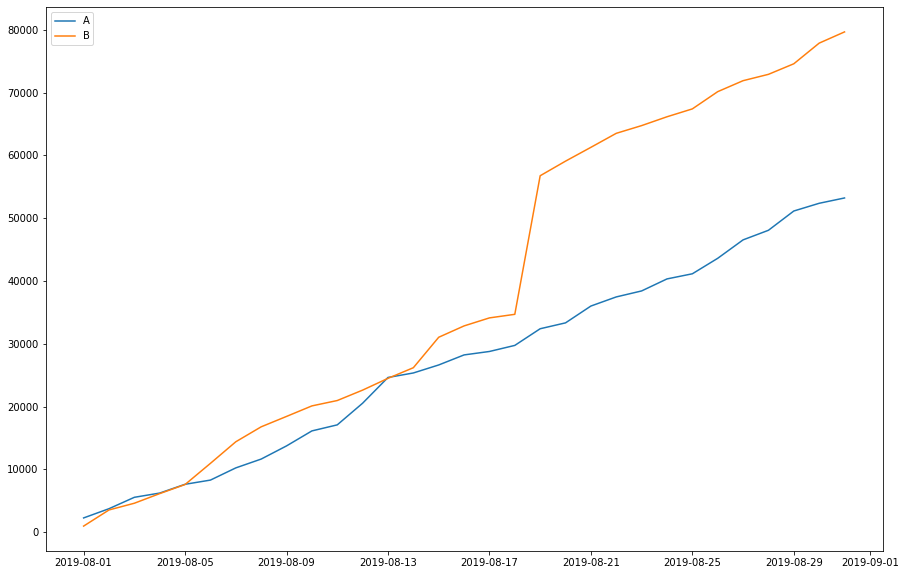

In [ ]:
# Gráfico que muestar el ingreso acumulado por grupo

# Agrupo ingresos por grupo A
cumulative_rev_A= cumulative_data[cumulative_data['group']== "A"][['date','revenue','orders']]

# Agrupo ingresos por grupo B
cumulative_rev_B= cumulative_data[cumulative_data['group']== "B"][['date','revenue','orders']]


# Gráfico A y B
plt.figure(figsize=(15,10))
plt.plot(cumulative_rev_A['date'], cumulative_rev_A['revenue'], label='A')
plt.plot(cumulative_rev_B['date'], cumulative_rev_B['revenue'], label='B')
plt.legend()


Como podemos observar, los ingresos aumentan constantemente para ambos grupos. Además, podemos ver que el grupo B tiene un pico de ingresos notable y a partir de ahí sigue en crecimiento constante. Esto puede deberse a un aumento en los pedidos o compra de pedidos muy caros que hacen aumentar los ingresos.

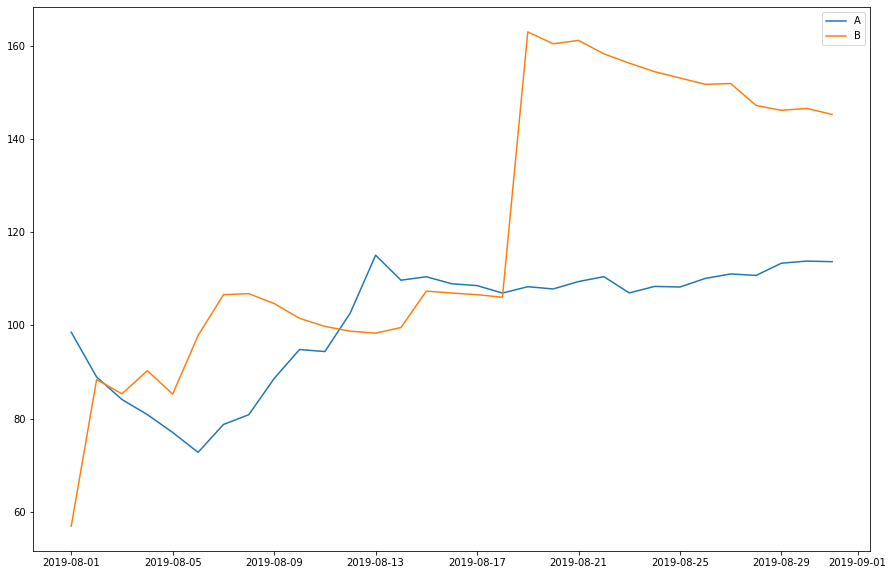

In [ ]:
# Gráfico  que muestra el tamaño de pedido promedio acumulado por grupo

plt.figure(figsize=(15,10))
plt.plot(cumulative_rev_A['date'], cumulative_rev_A['revenue'] / cumulative_rev_A['orders'], label='A')
plt.plot(cumulative_rev_B['date'], cumulative_rev_B['revenue'] / cumulative_rev_B['orders'], label='B')
plt.legend()

Como podemos observar en el gráfico, los datos son muy fluctuantes. A pesar de esas fluctuaciones, también podemos ver el pico que tiene el grupo B. A diferencia con el gráfico de los ingresos donde luego del pico los ingresos siguen aumentando, aca luego del pico, el tamaño de pedido promedio desciende. El grupo A dentro de las fluctuaciones que tiene, se mantuvo un poco más estable.

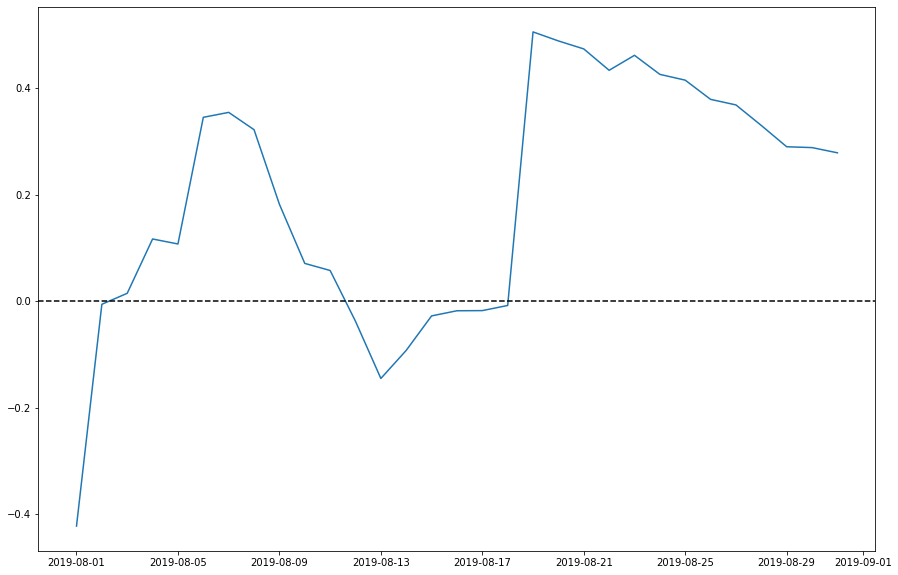

In [ ]:
# Gráfico que muestra la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A

cumulative_revenueAB= cumulative_rev_A.merge(cumulative_rev_B, left_on='date',right_on='date',suffixes=['A','B'])

plt.figure(figsize=(15,10))
plt.plot(cumulative_revenueAB['date'],(cumulative_revenueAB['revenueB'] / cumulative_revenueAB['ordersB']) / (cumulative_revenueAB['revenueA']/cumulative_revenueAB['ordersA'])-1)
plt.axhline(y=0, color='black',linestyle='--')

Podemos observar que hay varios cambios repentinos y considerables. Al igual que en el gráfico anterios, luego del pico de pedidos, comienza a descender.

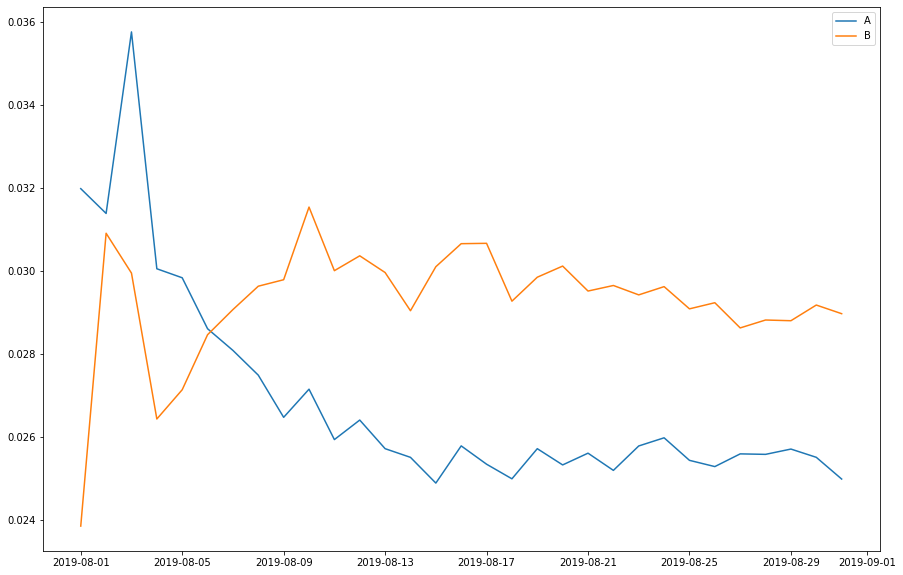

In [ ]:
# Calculo la tasa de conversión de cada grupo.

cumulative_data['conversion']= cumulative_data['orders']/ cumulative_data['visits']

# Separo datos por grupo de prueba A y B

cumulative_data_a= cumulative_data[cumulative_data['group'] == 'A']

cumulative_data_b= cumulative_data[cumulative_data['group'] == 'B']

#Represento gráficamente las tasas de conversión diarias de los dos grupos

plt.figure(figsize=(15,10))
plt.plot(cumulative_data_a['date'],cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'],cumulative_data_b['conversion'], label='B')
plt.legend()

El gráfico muestra que al principio de la prueba, el grupo A tenía una tasa de conversión más alta que B. Sin embargo, podemos observar que la tasa de conversión de B comenzó a aumentar hasta superar a la tasa de conversión de  A y se mantuvo ,aunque con algunas fluctuaciones, por encima de A. 

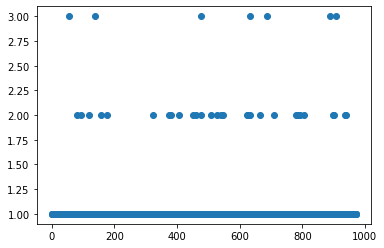

In [ ]:
#Trazo un gráfico de dispersión del número de pedidos por usuario

# Busco cantidad de pedidos realizo cada usuario
order_user= orders_filtered.drop(['group','revenue','date'], axis=1).groupby('visitorId',as_index=False).agg({'transactionId':pd.Series.nunique})
order_user.columns=['visitorId','orders']

# Gráfico de dispersión
x_values= pd.Series(range(0,len(order_user)))
plt.scatter(x_values, order_user['orders'])

Como demuestra el gráfico, la mayoría de los usuarios hicieron 1 pedido. En menor medida tenemos usuarios que hicieron 2 y 3 pedidos aunque no sabemos con exactitud cuantos fueron.

In [ ]:
# Calculo los percentiles 95 y 99 para el número de pedidos por usuario. 
np.percentile(order_user['orders'],[95,99])

array([1., 2.])

Podemos observar que no más de 5% de los usuarios realizaron más de 1 pedido y no más del 1% de los usuarios realizaron más de 2 pedidos. (a partir de 2 ya es anómalo)

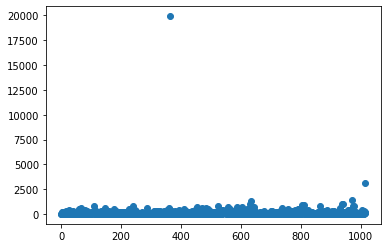

In [ ]:
# Trazo un gráfico de dispersión de los precios de los pedidos. 

x_values= pd.Series(range(0,len(orders_filtered['revenue'])))
plt.scatter(x_values, orders_filtered['revenue'])


A simple vista, podemos observar que la mayoría de los precios de los pedidos estan por debajo de 1000. Sin embargo, podemos ver que tambíen hay precios por arriba de ese valor y uno muy superior cerca de los 20000.  

In [ ]:
# Calculo los percentiles 95 y 99 de los precios de los pedidos. 
np.percentile(orders_filtered['revenue'], [95,99])

array([414.275, 830.3  ])

Podemos observar que no más del 5% de los precios superan 414 y no más del 1% superan 830. (Voy a tomar como datos atipicos a partir de 600 para eliminar entre el 5% y el 1% .

In [ ]:
# Busco la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto

# Separo los datos por grupo A y B

orders_a= orders_filtered[orders_filtered['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})
orders_a.columns=['visitorId','orders']

orders_b= orders_filtered[orders_filtered['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})
orders_b.columns=['visitorId','orders']

# Calculo para cada grupo la cantidad de compras por usuario

group_a= pd.concat([orders_a['orders'],pd.Series(0,index= np.arange(visits[visits['group']== 'A']['visits'].sum() - len(orders_a['orders'])),name='orders')],axis=0)

group_b=  pd.concat([orders_b['orders'],pd.Series(0,index= np.arange(visits[visits['group']== 'B']['visits'].sum() - len(orders_b['orders'])),name='orders')],axis=0)

# Calculo significación estadistíca
print('P_value:',stats.mannwhitneyu(group_a,group_b)[1])

# Calculo ganancia relativa de conversión grupo b
print('Diferencia relativa grupo B:',group_b.mean() / group_a.mean()-1)

P_value: 0.011018084110014696
Diferencia relativa grupo B: 0.1597977924896936


El p_value resultó ser menor a 0.05 de alpha, por lo que rechazo la hipótesis nula. El análisis de los datos sin procesar,mostró que la diferencia ente los grupos A y B es estadísticamente significativa. 

El grupo B tiene una ganancia de conversión relativa del 15% con respecto al grupo A.

In [ ]:
# Busco la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto

# Calculo significación estadistíca
print('P_value:',stats.mannwhitneyu(orders_filtered[orders_filtered['group'] == 'A']['revenue'],orders_filtered[orders_filtered['group'] == 'B']['revenue'])[1])

# Calculo ganancia relativa de conversión grupo b
print('Diferencia relativa grupo b:',orders_filtered[orders_filtered['group'] == 'B']['revenue'].mean() / orders_filtered[orders_filtered['group'] == 'A']['revenue'].mean() -1)

P_value: 0.8622329690015668
Diferencia relativa grupo b: 0.27834487693078414


El p_value es mayor que alpha(0.05), no tengo motivos para rechazar la hipótesis nula.

El grupo B tiene un mayor tamaño promedio de pedidos (27%).

A continuación, voy a eliminar las anomalías de mis datos para ver como cambia el resultado de las pruebas.

In [ ]:
# Filtro los usuarios con muchas órdenes
abnormal_orders= pd.concat([orders_a[orders_a['orders'] > 1]['visitorId'],orders_b[orders_b['orders'] > 1]['visitorId']],axis=0)

# Filtro los datos por total de ingreso
abnormal_revenue= orders_filtered[orders_filtered['revenue'] > 600]['visitorId']

# Uno ambas tablas
abnormal_users= pd.concat([abnormal_orders, abnormal_revenue], axis=0).drop_duplicates().sort_values()

In [ ]:
# Busco la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados

# Separo por grupos
a_filtered= pd.concat([orders_a[np.logical_not(orders_a['visitorId'].isin(abnormal_users))]['orders'],pd.Series(0,index= np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(orders_a['orders'])),name='orders')],axis=0)

b_filtered=  pd.concat([orders_b[np.logical_not(orders_b['visitorId'].isin(abnormal_users))]['orders'],pd.Series(0,index= np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(orders_b['orders'])),name='orders')],axis=0)

# Calculo significación estadistíca
print('P_value:',stats.mannwhitneyu(a_filtered,b_filtered)[1])

# Calculo ganancia relativa de conversión grupo b
print('Diferencia relativa entre los dos grupos:',b_filtered.mean() / a_filtered.mean()-1)

P_value: 0.006317042055931068
Diferencia relativa entre los dos grupos: 0.19602815068535206


Teniendo en cuenta el valor alpha de 0.05, rechazo la hipótesis nula ya que la diferencia es estadísticamente significativa.

En comparación con los datos por grupos sin sacar los valores anómalos, el p_value de los datos filtrados es menor que el de los datos en bruto.

El grupo B sigue teniendo una ganancia relativa mayor al grupo A. En este caso, las ganancias en los datos filtrados es de 19% mientras que en los datos sin filtrar era de 15%.

In [ ]:
# Busco la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados

# Calculo significación estadistíca
print('P_value:', stats.mannwhitneyu(orders_filtered[np.logical_and(orders_filtered['group'] == 'A',np.logical_not(orders_filtered['visitorId'].isin(abnormal_users)))]['revenue'],orders_filtered[np.logical_and(orders_filtered['group'] == 'B',np.logical_not(orders_filtered['visitorId'].isin(abnormal_users)))]['revenue'])[1])

# Calculo ganancia relativa de conversión grupo b
print('Diferencia relativa entre los dos grupos:',orders_filtered[np.logical_and(orders_filtered['group'] == 'B',np.logical_not(orders_filtered['visitorId'].isin(abnormal_users)))]['revenue'].mean() / orders_filtered[np.logical_and(orders_filtered['group'] == 'A',np.logical_not(orders_filtered['visitorId'].isin(abnormal_users)))]['revenue'].mean() -1)

P_value: 0.8343101668191173
Diferencia relativa entre los dos grupos: 0.06074262145919951


Como podemos observar, no tenemos motivos para rechazar la hipótesis nula y el tamaño promedio de pedidos del grupo B es apenas 6% más que el grupo A.

## Conclusiones


Para concluir, hay una leve diferencia entre los datos completos y los datos filtrados(sin anomalías). Con respecto a la diferencia en la conversión podemos observar que hay una diferencia estadíasticamente significativa. Antes del filtrado de datos, el valor_p era de 0.011 luego de sacar los valores atípicos paso a ser de 0.006. El grupo B paso a tener una diferencia relativa con respecto al grupo A de 15% a 19%.

En relación a la diferencia en el tamaño promedio, el valor p no mostro cambios significativos mientras que la diferencia relativa del grupo B con respecto al grupo A disminuyó considerablemente. Paso de 27% a un 6% luego de filtrar los datos. A pesar de todo esto el grupo B sigue teniendo la delantera con respecto al grupo A.
